In [61]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [62]:
qnumber = 3

circ = QuantumCircuit(qnumber)

In [63]:
def increment(circ):
    circ.toffoli(0, 1, 2)
    circ.cnot(0, 1)

In [64]:
def get_equation(circ):
    state = Statevector.from_int(0, 8)
    state = state.evolve(circ)
    return state

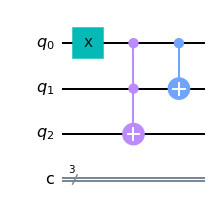

In [65]:
inc = QuantumCircuit(qnumber, qnumber)
inc.x(0)
increment(inc)
inc.draw("mpl")
# 001

In [66]:
get_equation(inc).draw("latex")

<IPython.core.display.Latex object>

In [67]:
def decrement(circ):
    circ.x(0)
    circ.x(1)
    circ.toffoli(0, 1, 2)
    circ.x(1)
    circ.cnot(0, 1)
    circ.x(0)

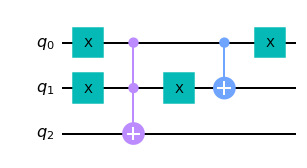

In [68]:
dec = QuantumCircuit(qnumber)
decrement(dec)
dec.draw("mpl")

In [69]:
get_equation(dec).draw("latex")

<IPython.core.display.Latex object>

In [70]:
def step(circ):
    circ.h(0)
    increment(circ)
    decrement(circ)

In [71]:
def n_steps(n, circ):
    for _ in range(n):
        step(circ)

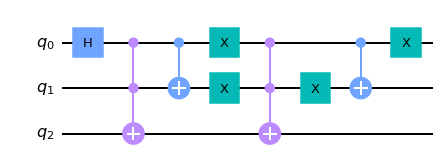

In [72]:
one_step_circ = QuantumCircuit(qnumber)
n_steps(1, one_step_circ)
one_step_circ.draw("mpl")

In [73]:
get_equation(one_step_circ).draw("latex")

<IPython.core.display.Latex object>

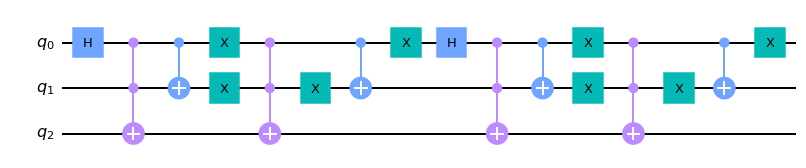

In [74]:
two_step_circ = QuantumCircuit(qnumber)
n_steps(2, two_step_circ)
two_step_circ.draw("mpl")

In [75]:
get_equation(two_step_circ).draw("latex")

<IPython.core.display.Latex object>

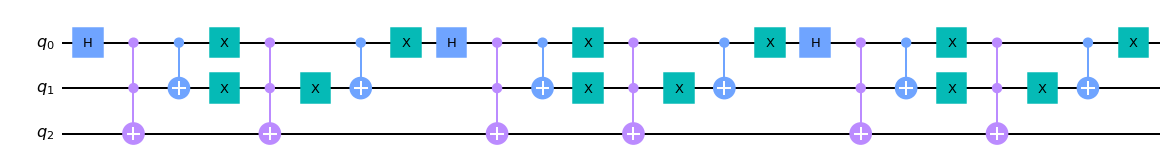

In [76]:
three_step_circ = QuantumCircuit(qnumber)
n_steps(3, three_step_circ)
three_step_circ.draw("mpl")

In [77]:
get_equation(two_step_circ).draw("latex")

<IPython.core.display.Latex object>

In [78]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

def simulate(circ):
    circ.measure_all()
    backend = QasmSimulator()
    qc_compiled = transpile(circ, backend, optimization_level=3)
    job_sim = backend.run(qc_compiled, shots=1024)
    result_sim = job_sim.result()
    return result_sim.get_counts(qc_compiled)

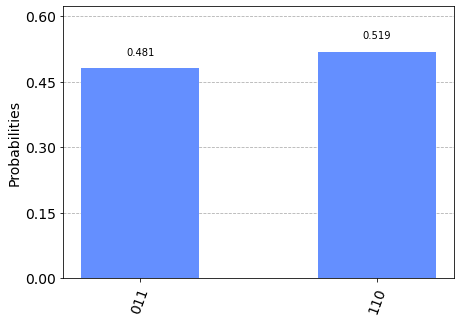

In [79]:
plot_histogram(simulate(one_step_circ))

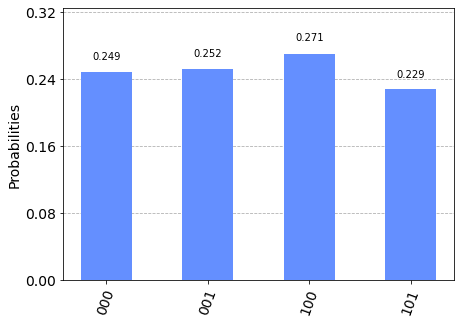

In [80]:
plot_histogram(simulate(two_step_circ))

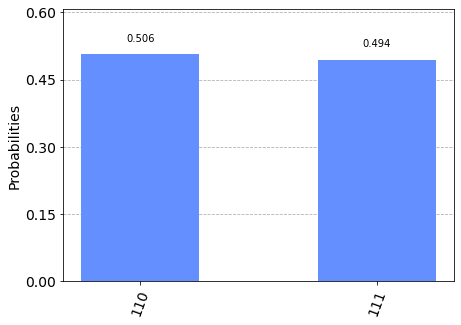

In [81]:
plot_histogram(simulate(three_step_circ))

In [82]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
n=2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-04-10 17:42:21,465: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima


In [83]:
from qiskit.tools.monitor import job_monitor

def run_on_machine(circ, backend):
    qc_compiled = transpile(circ, backend, optimization_level=1)
    job = backend.run(qc_compiled, shots=4096)
    job_monitor(job, interval = 1)
    result = job.result()
    return result.get_counts()

Job Status: job has successfully run


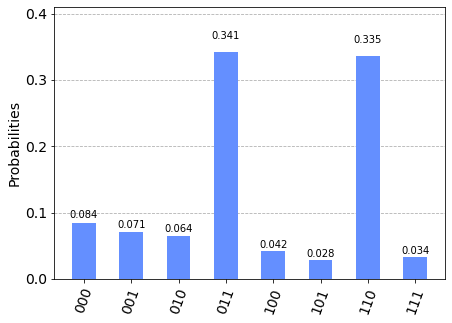

In [84]:
plot_histogram(run_on_machine(one_step_circ, backend))

Job Status: job has successfully run


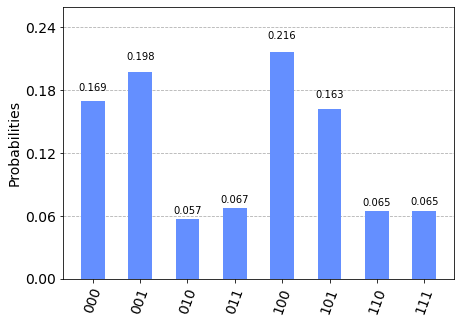

In [85]:
plot_histogram(run_on_machine(two_step_circ, backend))

Job Status: job has successfully run


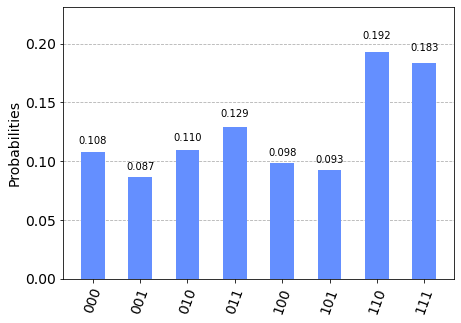

In [86]:
plot_histogram(run_on_machine(three_step_circ, backend))